In [ ]:
#

In [2]:
#working training algorithm for classification
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np
import os

# Define data directory
data_dir =  r"C:\Users\ninio\ml datasets\individusl_taken_photos"

# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224 pixels
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

# Create an ImageFolder dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Print the number of photos in each subfolder and their labels
for class_name, class_idx in dataset.class_to_idx.items():
    class_path = os.path.join(data_dir, class_name)
    num_photos = len(os.listdir(class_path))
    print(f"Class: {class_name}, Label: {class_idx}, Number of Photos: {num_photos}")

# Split dataset into train and test sets
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.2 * dataset_size))  # 20% for testing

train_indices = []
test_indices = []

# Split indices into train and test sets for each class
for class_idx in range(len(dataset.classes)):
    class_indices = [idx for idx in indices if dataset.targets[idx] == class_idx]
    np.random.shuffle(class_indices)
    split_idx = int(len(class_indices) * 0.2)
    train_indices.extend(class_indices[split_idx:])
    test_indices.extend(class_indices[:split_idx])

# Create samplers for training and testing subsets
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Create DataLoader instances for training and testing with specified batch size
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self, num_classes=6):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {correct / total}")


Class: cardboard, Label: 0, Number of Photos: 403
Class: glass, Label: 1, Number of Photos: 501
Class: metal, Label: 2, Number of Photos: 410
Class: paper, Label: 3, Number of Photos: 594
Class: plastic, Label: 4, Number of Photos: 482
Class: trash, Label: 5, Number of Photos: 137
Epoch [1/5], Loss: 2.008601948618889
Epoch [2/5], Loss: 1.009292533621192
Epoch [3/5], Loss: 0.6401177062653005
Epoch [4/5], Loss: 0.3522725561633706
Epoch [5/5], Loss: 0.1285200027632527
Test Accuracy: 0.6500994035785288


In [ ]:
testing above model
import torch
from PIL import Image
import torchvision.transforms as transforms

# Load the model
model = CNN()  # Assuming you've defined the CNN model class as shown in your code
model.eval()  # Set the model to evaluation mode

# Define the path to the random photo
random_photo_path = "path_to_your_random_photo.jpg"

# Define the transformations to apply
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and transform the image
image = Image.open(random_photo_path)
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform prediction
with torch.no_grad():
    outputs = model(image_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Convert probabilities to numpy array
probabilities = probabilities.squeeze().numpy()

# Print the class probabilities
for i, prob in enumerate(probabilities):
    print(f"Class {i}: Probability {prob:.4f}")


In [4]:
#saving train and test data to anew foler 
import shutil

# Define directories for new train and test datasets
train_dir = r"C:\Users\ninio\OneDrive\Documents\mldatasets\individusl_taken_photos\train"
test_dir = r"C:\Users\ninio\OneDrive\Documents\mldatasets\individusl_taken_photos\test"

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy or move images from original dataset to new train and test directories
for idx in train_indices:
    image_path, label = dataset.imgs[idx]
    class_name = dataset.classes[label]
    new_image_path = os.path.join(train_dir, class_name, os.path.basename(image_path))
    os.makedirs(os.path.dirname(new_image_path), exist_ok=True)
    shutil.copy(image_path, new_image_path)

for idx in test_indices:
    image_path, label = dataset.imgs[idx]
    class_name = dataset.classes[label]
    new_image_path = os.path.join(test_dir, class_name, os.path.basename(image_path))
    os.makedirs(os.path.dirname(new_image_path), exist_ok=True)
    shutil.copy(image_path, new_image_path)




In [28]:
import os

train_dir = r"C:\Users\ninio\mldatasets\individusl_taken_photos\train"
test_dir = r"C:\Users\ninio\mldatasets\individusl_taken_photos\test"

# Function to count files in a directory
def count_files(directory):
    # Initialize a dictionary to store counts for each subdirectory
    counts = {}
    # Iterate over each subdirectory
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        # Check if the item is a directory
        if os.path.isdir(subdir_path):
            # Count the files in the subdirectory
            num_files = len(os.listdir(subdir_path))
            # Store the count in the dictionary
            counts[subdir] = num_files
    return counts

# Count files in the train directory
train_counts = count_files(train_dir)
print("Number of files in each train subdirectory:")
for subdir, count in train_counts.items():
    print(f"{subdir}: {count}")

# Count files in the test directory
test_counts = count_files(test_dir)
print("\nNumber of files in each test subdirectory:")
for subdir, count in test_counts.items():
    print(f"{subdir}: {count}")


Number of files in each train subdirectory:
cardboard: 646
glass: 802
metal: 656
paper: 952
plastic: 772
trash: 220

Number of files in each test subdirectory:
cardboard: 80
glass: 100
metal: 82
paper: 118
plastic: 96
trash: 27


In [27]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms

# Define directories
data_dir = r"C:\Users\ninio\mldatasets\individusl_taken_photos"
train_dir = os.path.join(data_dir, "train")

# Define augmentation techniques
augmentation_techniques = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
]

# Define function to apply transformations to images and save them
def apply_transforms(image_paths, transform):
    for image_path in image_paths:
        img = Image.open(image_path)
        augmented_img = transform(img)
        augmented_img.save(image_path.replace('.jpg', '_augmented.jpg'))

# Iterate over class folders
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    
    # Collect image paths
    image_paths = [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir) if img_name.endswith(".jpg")]
    
    # Split image paths into four equal batches
    num_images = len(image_paths)
    batch_size = num_images // 4
    batch_indices = np.array_split(np.random.permutation(num_images), 4)
    
    # Apply augmentation techniques to each batch
    for batch_idx, indices in enumerate(batch_indices):
        if batch_idx == 3:  # Apply all augmentation techniques to the last batch
            transform = transforms.Compose(augmentation_techniques)
        else:
            transform = augmentation_techniques[batch_idx % len(augmentation_techniques)]
        
        apply_transforms([image_paths[i] for i in indices], transform)

# Print augmentation information (optional)
for class_name in os.listdir(train_dir):
    print(f"Class: {class_name}")
    num_images = len([img_name for img_name in os.listdir(os.path.join(train_dir, class_name)) if img_name.endswith("_augmented.jpg")])
    print(f"Number of Augmented Images: {num_images}")

# Print one photo from each augmentation batch (optional)
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    image_path = os.path.join(class_dir, "0_augmented.jpg")
    print(f"Augmented Image: {image_path}")


Class: cardboard
Augmentation Technique 1: RandomHorizontalFlip(p=0.5), Number of Images: 82
Augmentation Technique 2: RandomVerticalFlip(p=0.5), Number of Images: 82
Augmentation Technique 3: RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0), Number of Images: 82
Augmentation Technique 4: ColorJitter(brightness=(0.7, 1.3), contrast=(0.7, 1.3), saturation=(0.7, 1.3), hue=(-0.1, 0.1)), Number of Images: 81
Class: glass
Augmentation Technique 1: RandomHorizontalFlip(p=0.5), Number of Images: 102
Augmentation Technique 2: RandomVerticalFlip(p=0.5), Number of Images: 101
Augmentation Technique 3: RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0), Number of Images: 101
Augmentation Technique 4: ColorJitter(brightness=(0.7, 1.3), contrast=(0.7, 1.3), saturation=(0.7, 1.3), hue=(-0.1, 0.1)), Number of Images: 101
Class: metal
Augmentation Technique 1: RandomHorizontalFlip(p=0.5), Number of Images: 83
Augmentation Technique 2: R

In [21]:
import os

# Define function to delete files containing "augmented" in their filename
def delete_augmented_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if 'augmented' in file:
                os.remove(os.path.join(root, file))

# Call the function to delete augmented files
delete_augmented_files(train_dir)


In [5]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder


#train and test data directory
data_dir = r"C:\Users\ninio\OneDrive\Documents\mldatasets\individusl_taken_photos\train"
test_dir = r"C:\Users\ninio\OneDrive\Documents\mldatasets\individusl_taken_photos\test"



#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

test_dataset = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

In [6]:
img, label = dataset[1]
print(img.shape,label)

#output :
#torch.Size([3, 150, 150]) 0

torch.Size([3, 150, 150]) 0


In [7]:
print("Follwing classes are there : \n",dataset.classes)

#output:
#Follwing classes are there : 
# ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Follwing classes are there : 
 ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


Label : cardboard


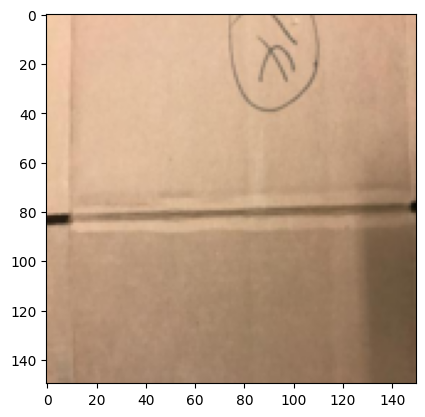

In [8]:
import matplotlib.pyplot as plt
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [10]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 1000
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 1024
Length of Validation Data : 1000


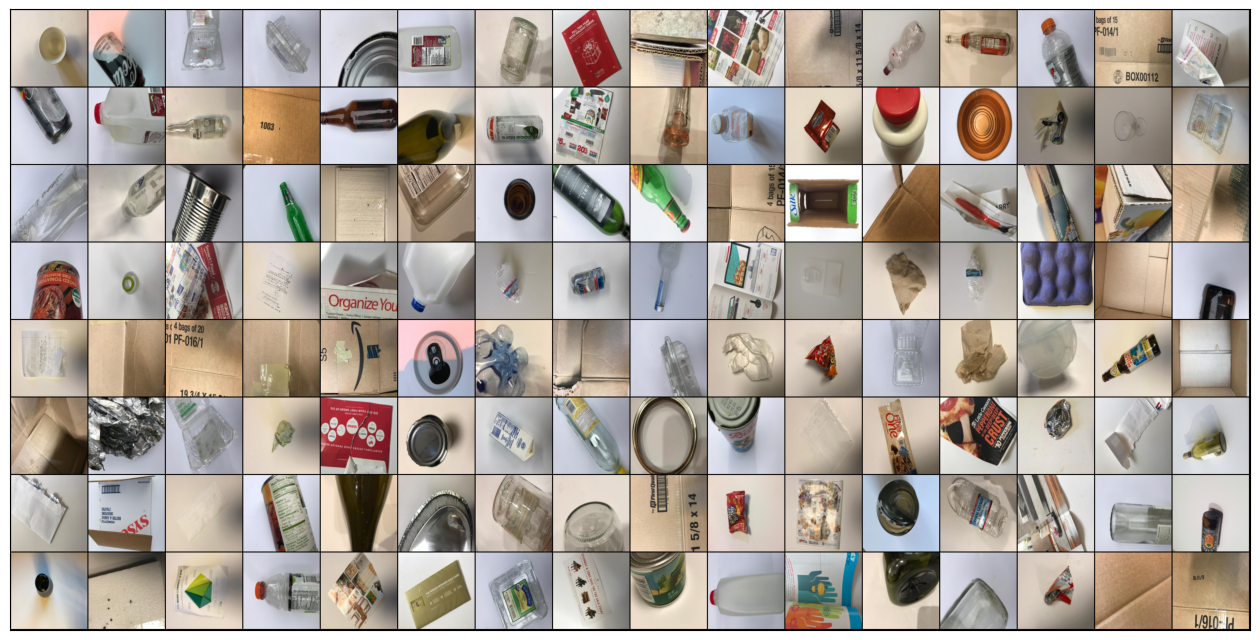

In [11]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [13]:
class NaturalSceneClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(82944,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,6)
        )
    
    def forward(self, xb):
        return self.network(xb)

In [14]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [15]:
import torch.nn as nn
import torch.optim as optim

# Define the model
model = NaturalSceneClassification()

# Define the number of epochs, optimizer function, and learning rate
num_epochs = 30
opt_func = optim.Adam
lr = 0.001

# Fit the model on the training data and validate on the validation data
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)


Epoch [0], train_loss: 1.7613, val_loss: 1.7433, val_acc: 0.2276
Epoch [1], train_loss: 1.7346, val_loss: 1.7413, val_acc: 0.1940
Epoch [2], train_loss: 1.7436, val_loss: 1.7335, val_acc: 0.2276
Epoch [3], train_loss: 1.7165, val_loss: 1.7344, val_acc: 0.2276
Epoch [4], train_loss: 1.6253, val_loss: 1.5526, val_acc: 0.3040
Epoch [5], train_loss: 1.5325, val_loss: 1.5015, val_acc: 0.3747
Epoch [6], train_loss: 1.4946, val_loss: 1.4953, val_acc: 0.3727
Epoch [7], train_loss: 1.4410, val_loss: 1.4380, val_acc: 0.4164
Epoch [8], train_loss: 1.4003, val_loss: 1.4189, val_acc: 0.3773
Epoch [9], train_loss: 1.3280, val_loss: 1.3328, val_acc: 0.4637
Epoch [10], train_loss: 1.2425, val_loss: 1.2720, val_acc: 0.4999
Epoch [11], train_loss: 1.1276, val_loss: 1.2290, val_acc: 0.5272
Epoch [12], train_loss: 1.0537, val_loss: 1.3014, val_acc: 0.5023
Epoch [13], train_loss: 1.0708, val_loss: 1.2850, val_acc: 0.5007
Epoch [14], train_loss: 0.9702, val_loss: 1.2779, val_acc: 0.5250
Epoch [15], train_lo

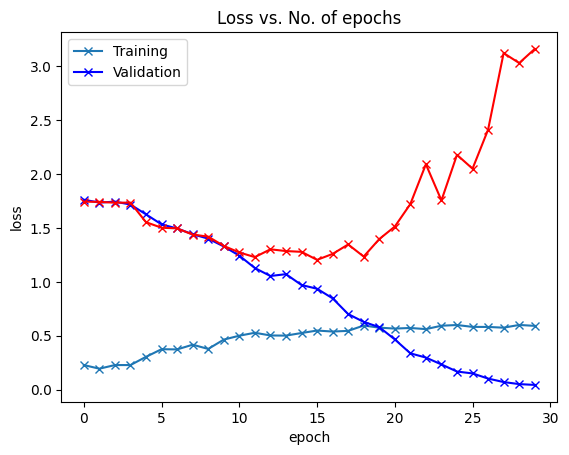

In [16]:

def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)